### 1. Setting global

In [1]:
global graph_opts ///
	title(, justification(left) color(black) span pos(11)) ///
	graphregion(color(white) lc(white) lw(med) la(center)) /// <- remove la(center) for Stata < 15
	ylab(,angle(0) nogrid) xtit(,placement(left) justification(left)) ///
	yscale(noline) xscale(noline) legend(region(lc(none) fc(none)))

global comb_opts ///
	graphregion(color(white) lc(white) lw(med) la(center))

### 2. Running ado.file

In [2]:
qui do "https://raw.githubusercontent.com/worldbank/Stata-IE-Visual-Library/develop/Library/Charts/Chart%20of%20marginal%20effect%20with%20results%20table%20(Differences%20by%20different%20variables)/chartable.ado"

### 3. Uploading data

In [3]:
use "https://github.com/worldbank/Stata-IE-Visual-Library/raw/develop/Library/Charts/Chart%20of%20marginal%20effect%20with%20results%20table%20(Differences%20by%20different%20variables)/data.dta", clear

### 4. Creating graphs

In [4]:
qui chartable ///
		correct treat_cxr re_3 treat_refer med_any med_l_any_1 med_l_any_2 med_l_any_3  med_k_any_9  ///
		[pweight = weight_city] ///
		, $graph_opts rhs(type_formal 3.city i.case ) case0(Non-MBBS) case1(MBBS+) or command(logit) title("A. Differences by MBBS Qualification")

		qui graph save "Fig_3_1.gph" , replace

qui chartable ///
		correct treat_cxr re_3 re_4 treat_refer med_any med_l_any_1 med_l_any_2 med_l_any_3  med_k_any_9  ///
		if type_formal == 0 ///
		[pweight = weight_city] ///
		, $graph_opts rhs(3.city i.case ) case0(Patna Non-MBBS) case1(Mumbai Non-MBBS) or command(logit) title("B. Non-MBBS Differences by City")

		qui graph save "Fig_3_2.gph" , replace

qui chartable ///
		correct treat_cxr re_3 re_4 treat_refer med_any med_l_any_1 med_l_any_2 med_l_any_3  med_k_any_9  ///
		if type_formal == 1 ///
		[pweight = weight_city] ///
		, $graph_opts rhs(3.city i.case ) case0(Patna MBBS+) case1(Mumbai MBBS+) or command(logit) title("C. MBBS Differences by City")

		qui graph save "Fig_3_3.gph" , replace


(note:  named style med not found in class linewidth, default attributes used)
(note:  linewidth not found in scheme, default attributes used)


(note:  named style med not found in class linewidth, default attributes used)
(note:  linewidth not found in scheme, default attributes used)


(note:  named style med not found in class linewidth, default attributes used)
(note:  linewidth not found in scheme, default attributes used)



### 5. Combining the graphs 

(note:  named style med not found in class linewidth, default attributes used)
(note:  linewidth not found in scheme, default attributes used)
(note:  named style med not found in class linewidth, default attributes used)
(note:  linewidth not found in scheme, default attributes used)
(note:  named style med not found in class linewidth, default attributes used)
(note:  linewidth not found in scheme, default attributes used)
(note:  named style med not found in class linewidth, default attributes used)
(note:  linewidth not found in scheme, default attributes used)


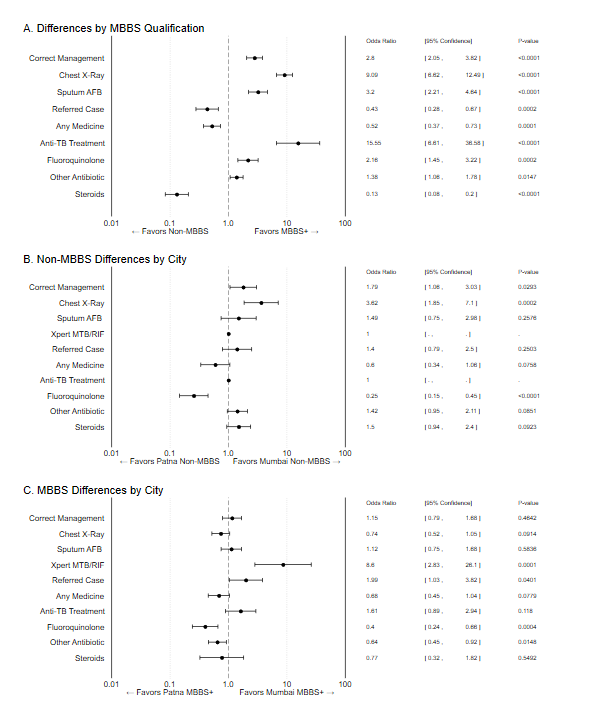

In [5]:
graph combine ///
	"Fig_3_1.gph" ///
	"Fig_3_2.gph" ///
	"Fig_3_3.gph" ///
	, $comb_opts xsize(5) c(1) ysize(6) altshrink

### 6. Exporting the graph

In [6]:
qui graph export "figure.png" , replace width(2000)